# Kernel PCA

Modified Example from scikit-learn

By Yaohang Li

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
np.random.seed(0)

X1, y1 = make_circles(n_samples=400, factor=.3, noise=.05)
X2, y2 = make_circles(n_samples=400, factor=.6, noise=.05)

In [3]:
y2 = y2 * 2

In [4]:
X = np.concatenate([X1, X2], axis = 0)
y = np.concatenate([y1, y2], axis = 0)

## Visualize the data

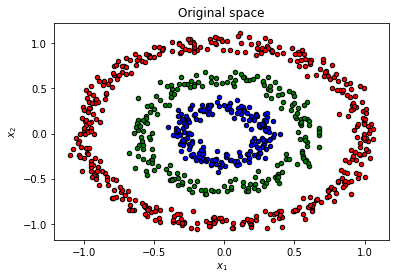

In [5]:
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1
greens = y == 2
# yellows = y == 3

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X[greens, 0], X[greens, 1], c="green",
            s=20, edgecolor='k')
# plt.scatter(X[yellows, 0], X[yellows, 1], c="yellow",
#             s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Compare PCA and kernel PCA

In [6]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

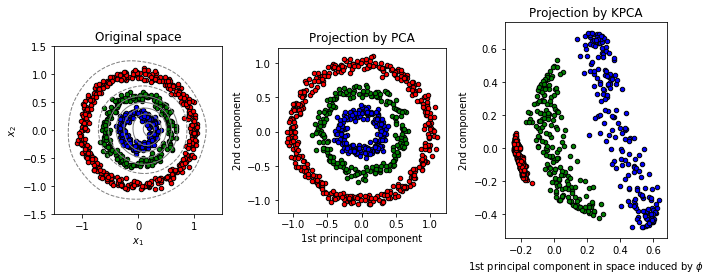

In [7]:
# Plot results

# plt.figure()
plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1
greens = y == 2

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X[greens, 0], X[greens, 1], c="green",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(1, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X_pca[greens, 0], X_pca[greens, 1], c="green",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(1, 3, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

# plt.subplot(2, 2, 4, aspect='equal')
# plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
#             s=20, edgecolor='k')
# plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
#             s=20, edgecolor='k')
# plt.scatter(X_back[greens, 0], X_back[greens, 1], c="green",
#             s=20, edgecolor='k')
# plt.title("Original space after inverse transform")
# plt.xlabel("$x_1$")
# plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()